In [1]:
#!pip install pymannkendall
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [9]:
######Importing data
import pandas as pd
data= pd.read_csv(r"C:\Users\edmun\Desktop\EDMONDO EL FREDONDO\PHD_MANUSCRIPT\MANUSCRIPTS\Hypertension Manuscript\ED.csv")
# Display the first few rows to understand the structure of the data
data.head()

,hyperten,NewAge,sex,marital,race,unemp,happy,hlthstrt,life,satjob1,diabetes,slpprblm,stress,satfin
0,0,Above 60,female,divorced,white,no,not too happy,iap,routine,somewhat satisfied,no,often,often,not satisfied at all
1,iap,Above 60,male,married,white,iap,not too happy,iap,routine,iap,iap,iap,iap,more or less satisfied
2,0,51-60,female,divorced,white,no,not too happy,iap,routine,somewhat satisfied,no,rarely,hardly ever,more or less satisfied
3,0,18-30,female,never married,white,iap,not too happy,iap,routine,not too satisfied,no,sometimes,sometimes,pretty well satisfied
4,iap,Above 60,male,never married,white,no,pretty happy,iap,routine,iap,iap,iap,iap,not satisfied at all


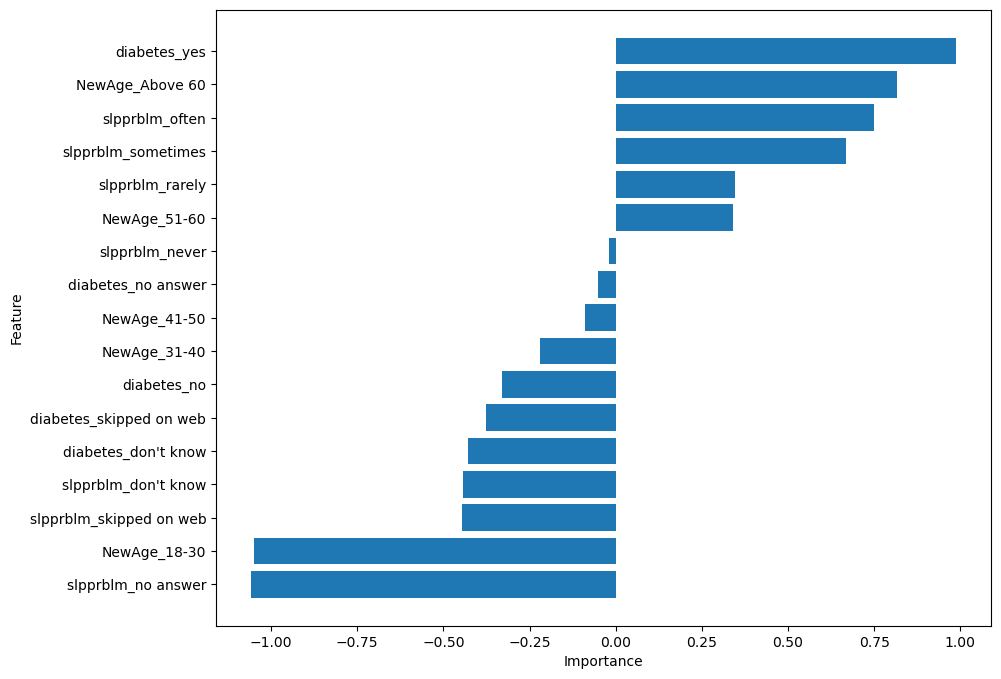

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Replace 'iap' placeholders with NaN
data.replace('iap', np.nan, inplace=True)

# Drop rows where 'hyperten' is NaN
data.dropna(subset=['hyperten'], inplace=True)

# Define the target and features
X = data[['NewAge', 'diabetes', 'slpprblm']]
y = data['hyperten']

# Convert target to binary
y = y.apply(lambda x: 1 if x == 'yes' else 0)

# Preprocessing pipeline for categorical data
categorical_features = X.columns.tolist()
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Logistic Regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Fit the model
model.fit(X, y)

# Extract feature importance (coefficients)
importance = model.named_steps['classifier'].coef_[0]
feature_names = model.named_steps['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})

# Sort the DataFrame by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
#plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

### Random Forest

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Fill missing values if any
data = data.fillna('missing')

# Encode categorical features
label_encoders = {}
for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

# Define features and target
features = ['NewAge', 'sex', 'marital', 'race', 'unemp', 'happy', 'hlthstrt', 'life', 'satjob1', 'diabetes', 'slpprblm', 'stress', 'satfin']
target = 'hyperten'

X = data[features]
y = data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1911, 13), (478, 13), (1911,), (478,))

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Define hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [5, 10, 13],
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy']
}

# Random Forest Grid Search
rf_clf = RandomForestClassifier()
rf_search = GridSearchCV(
    rf_clf,
    rf_param_grid,
    cv=5,           # 5-fold cross-validation
    n_jobs=-1,      # Use all processors
    verbose=1
)

rf_search.fit(X_train, y_train)
print("Best RF Params:", rf_search.best_params_)

# Decision Tree grid 
dt_param_grid = {
'max_features': [5, 10, 13],
'max_depth': [4, 6, 8, 10, 12],
'criterion': ['gini', 'entropy']
    # n_estimators does NOT go here, as DecisionTree has no such parameter
}

dt_clf = DecisionTreeClassifier()
dt_search = GridSearchCV(
    dt_clf,
    dt_param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)
dt_search.fit(X_train, y_train)
print("Best DT Params:", dt_search.best_params_)

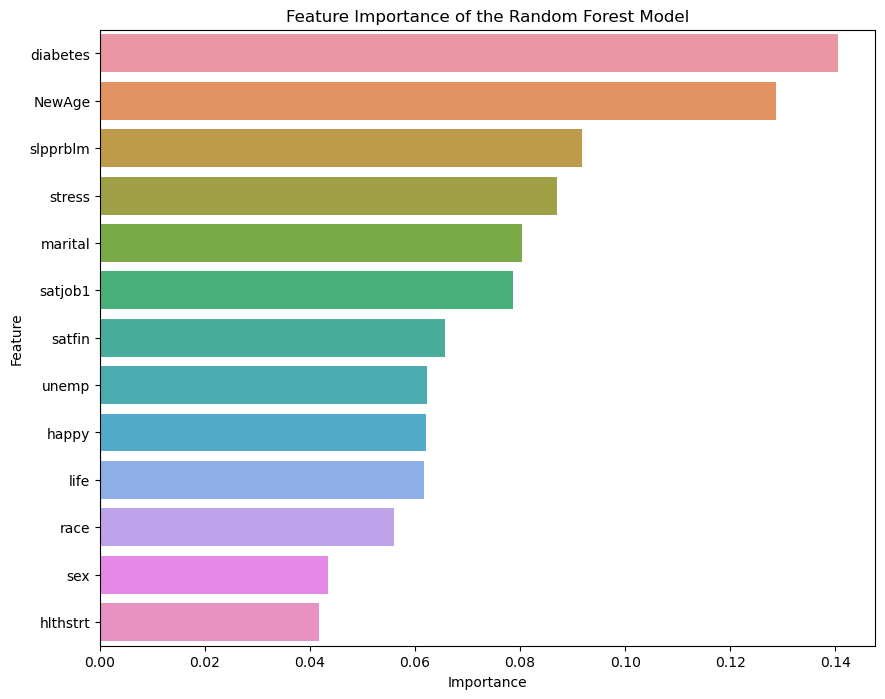

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Define the Random Forest model with fixed hyperparameters
rf = RandomForestClassifier(n_estimators=200, max_features=13, max_depth=10, criterion='gini', random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_
features_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance of the Random Forest Model')
plt.show()

In [41]:
print(features_df)

     Feature  Importance
9   diabetes    0.140558
0     NewAge    0.128764
10  slpprblm    0.091781
11    stress    0.087021
2    marital    0.080408
8    satjob1    0.078615
12    satfin    0.065646
4      unemp    0.062281
5      happy    0.061996
7       life    0.061731
3       race    0.056040
1        sex    0.043462
6   hlthstrt    0.041696


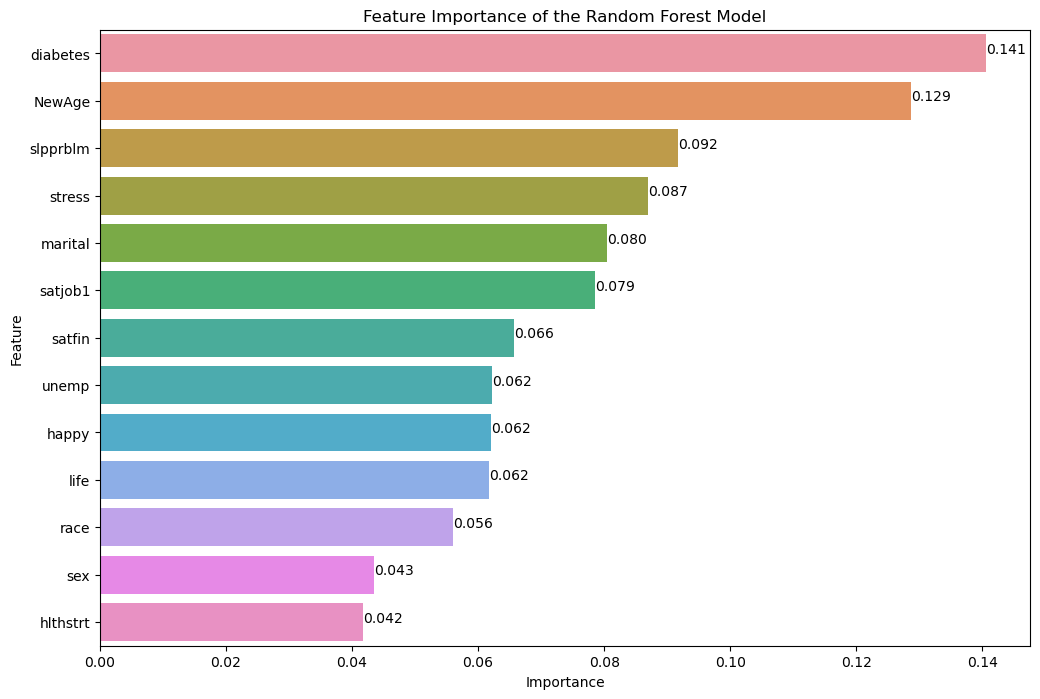

In [74]:
# Fit the model
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_
features_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot feature importances with values on bars
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
for index, value in enumerate(features_df['Importance']):
    plt.text(value, index, f'{value:.3f}')
plt.title('Feature Importance of the Random Forest Model')
plt.show()

### Decision Tree

In [11]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Just to be safe, let's plug holes in the data (if any)
data = data.copy()  # in case we want to play with data further down
if data.isnull().values.any():
    data = data.fillna('missing')  # could also try mode/median for numerics

# Not all columns are numbers, let's tidy that up
labelers = dict()
for col in data.columns:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        # Not everybody codes unseen data... so wrap it
        try:
            data[col] = le.fit_transform(data[col])
        except Exception as e:
            print(f"Encoding issue with {col}: {e}")
        labelers[col] = le

# A quick selection of columns we actually care about:
feature_cols = ['NewAge', 'sex', 'marital', 'race', 'unemp', 'happy','hlthstrt', 'life', 'satjob1', 'diabetes',
'slpprblm','stress', 'satfin']
target_col = 'hyperten'

X = data[feature_cols]
y = data[target_col]

# Carve out some data for checking our work later
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Let's double check the splits
print("Training shape:", X_train.shape)
print("Testing shape:", X_test.shape)
print("Training labels:", y_train.shape)
print("Testing labels:", y_test.shape)

# Let's bring in the tree, for fun
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

# See how we're doing, nothing fancy
train_score = tree.score(X_train, y_train)
test_score = tree.score(X_test, y_test)
print("Train accuracy:", round(train_score, 3))
print("Test accuracy:", round(test_score, 3))

Training shape: (3319, 13)
Testing shape: (830, 13)
Training labels: (3319,)
Testing labels: (830,)
Train accuracy: 0.997
Test accuracy: 0.806


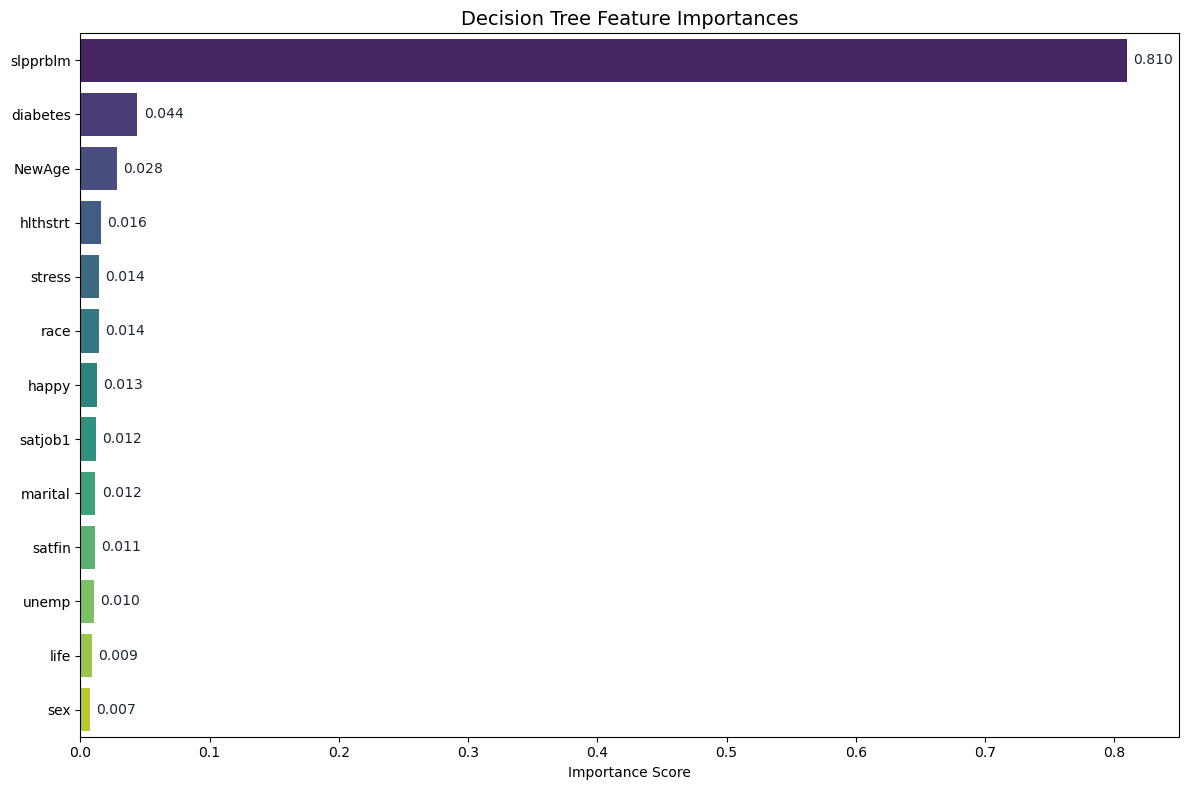

In [36]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Train a single decision tree (not a forest)
tree_model = DecisionTreeClassifier(
    max_features=13,
    max_depth=10,
    criterion='gini',
    random_state=42
)

tree_model.fit(X_train, y_train)

# Grab the importance of each feature, line them up in a DataFrame
feat_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': tree_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot using seaborn (horizontal bars feel right here)
plt.figure(figsize=(12, 8))
sns.barplot(
    x='Importance', y='Feature',
    data=feat_df,
    palette='viridis'
)

# Put the importance value at the end of each bar
for i, (imp, feat) in enumerate(zip(feat_df['Importance'], feat_df['Feature'])):
    plt.text(
        imp + 0.005,  # just off the end of the bar
        i,
        f'{imp:.3f}',
        va='center',
        fontsize=10,
        color='#1a2533'
    )

plt.title('Decision Tree Feature Importances', fontsize=14)
plt.xlabel('Importance Score')
plt.ylabel('')
plt.tight_layout()
plt.show()